In [35]:
#import libraries
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [56]:
#import dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [57]:
len(np.unique(test_labels))

10

number of classes is 10
(max of labels + 1 --> number of classes) OR len of labels

In [58]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

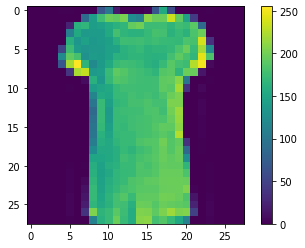

In [59]:
import matplotlib.pyplot as plt
plt.imshow(train_images[321])
plt.colorbar()

In [60]:
train_images=np.array(train_images)
test_images=np.array(test_images)
train_images.astype('float32')
test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255
train_images = np.array(train_images.reshape(-1,28,28,1))
test_images = np.array(test_images.reshape(-1,28,28,1))

In [62]:
train_labels=keras.utils.to_categorical(train_labels,num_classes=10)
test_labels=keras.utils.to_categorical(test_labels,num_classes=10)

In [69]:
model=Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [70]:
from keras.backend import categorical_crossentropy
optimizer=Adam(lr=0.01)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
h = model.fit(train_images,train_labels,batch_size=120,validation_split=0.2,epochs=15)

Epoch 1/15
400/400 [==============================] - 5s 11ms/step - loss: 0.7660 - accuracy: 0.7237 - val_loss: 0.4442 - val_accuracy: 0.8324
Epoch 2/15
400/400 [==============================] - 4s 11ms/step - loss: 0.4928 - accuracy: 0.8244 - val_loss: 0.3725 - val_accuracy: 0.8654
Epoch 3/15
400/400 [==============================] - 4s 10ms/step - loss: 0.4308 - accuracy: 0.8476 - val_loss: 0.3403 - val_accuracy: 0.8766
Epoch 4/15
400/400 [==============================] - 4s 10ms/step - loss: 0.3965 - accuracy: 0.8589 - val_loss: 0.3212 - val_accuracy: 0.8806
Epoch 5/15
400/400 [==============================] - 4s 10ms/step - loss: 0.3645 - accuracy: 0.8696 - val_loss: 0.3014 - val_accuracy: 0.8877
Epoch 6/15
400/400 [==============================] - 4s 10ms/step - loss: 0.3495 - accuracy: 0.8744 - val_loss: 0.2902 - val_accuracy: 0.8935
Epoch 7/15
400/400 [==============================] - 4s 11ms/step - loss: 0.3301 - accuracy: 0.8831 - val_loss: 0.2884 - val_accuracy: 0.8936

In [72]:
model.evaluate(test_images,test_labels,batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 0.2700 - accuracy: 0.9033


[0.2700384259223938, 0.9032999873161316]

In [73]:
p = model.predict(test_images)


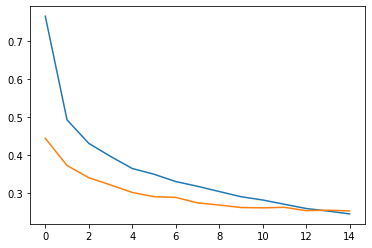

In [74]:
from matplotlib import pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])